In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import make_blobs

In [3]:
data=make_blobs(n_samples=300, n_features=2,centers=2,cluster_std=1.0,random_state=101)

In [4]:
X,y=data

In [6]:
y,len(y)

(array([1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
        0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
        0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
        1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
        1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
        0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
        1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
        0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
        0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
        1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
        0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 

In [5]:
np.random.seed(101)
z_noise=np.random.normal(size=len(X))
z_noise=pd.Series(z_noise)

In [6]:
z_noise

0      2.706850
1      0.628133
2      0.907969
3      0.503826
4      0.651118
         ...   
295    1.523750
296    1.290230
297   -1.478319
298    0.214234
299   -0.240510
Length: 300, dtype: float64

In [7]:
feat=pd.DataFrame(X)

In [8]:
feat.head()

,0,1
0,-8.877721,-6.760078
1,0.630638,3.107075
2,-0.240609,2.820690
3,-7.839091,-8.207545
4,-10.972908,-7.390676


In [9]:
feat.columns=['X1','X2']

In [10]:
feat['noise']=z_noise

In [11]:
feat.head()

,X1,X2,noise
0,-8.877721,-6.760078,2.706850
1,0.630638,3.107075,0.628133
2,-0.240609,2.820690,0.907969
3,-7.839091,-8.207545,0.503826
4,-10.972908,-7.390676,0.651118


<Axes: xlabel='X1', ylabel='X2'>

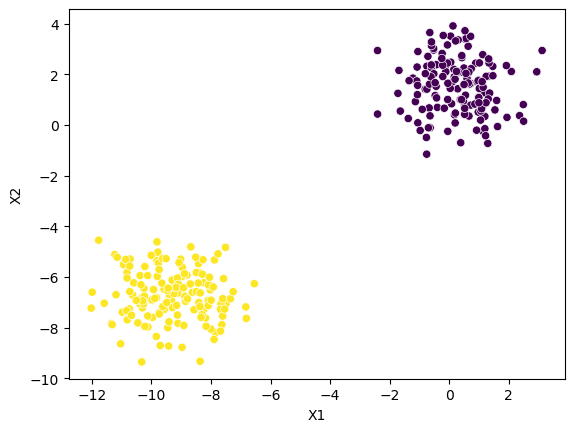

In [12]:
sns.scatterplot(feat,x='X1',y='X2',c=y)

In [13]:
from mpl_toolkits.mplot3d import axes3d

In [14]:
# %matplotlib notebook

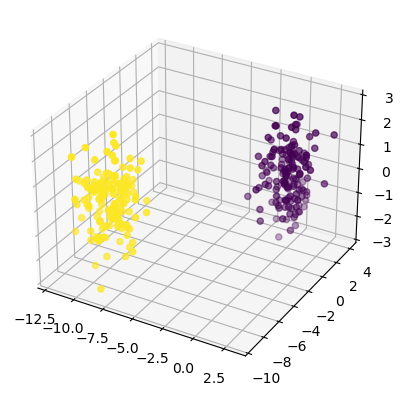

In [31]:
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(feat['X1'],feat['X2'],feat['noise'],c=y)  ##here z axis is noise

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [35]:
from tensorflow.keras.optimizers import SGD ## use in atoencoders to adjust the learning rate for hidden layer to understand the imp features

In [37]:
##3 layer--->2-->3 layer

In [87]:
encoder=Sequential()

In [89]:
encoder.add(Dense(units=2,activation='relu',input_shape=[3]))

In [91]:
decoder=Sequential()

In [93]:
decoder.add(Dense(units=3,activation='relu',input_shape=[2]))

In [95]:
autoencoder=Sequential([encoder,decoder])

In [97]:
autoencoder.compile(loss='mse',optimizer=SGD(learning_rate=0.5))

In [99]:
from sklearn.preprocessing import MinMaxScaler

In [101]:
scaler=MinMaxScaler()

In [103]:
feat_scale=scaler.fit_transform(feat)  ##we cant compare the result, so full trnasfrom

In [105]:
len(feat_scale)

300

In [107]:
autoencoder.fit(feat_scale,feat_scale,epochs=7)

Epoch 1/7
10/10 [==============================] - 0s 1ms/step - loss: 0.2224
Epoch 2/7
10/10 [==============================] - 0s 2ms/step - loss: 0.2197
Epoch 3/7
10/10 [==============================] - 0s 2ms/step - loss: 0.2193
Epoch 4/7
10/10 [==============================] - 0s 2ms/step - loss: 0.2190
Epoch 5/7
10/10 [==============================] - 0s 2ms/step - loss: 0.2189
Epoch 6/7
10/10 [==============================] - 0s 1ms/step - loss: 0.2186
Epoch 7/7
10/10 [==============================] - 0s 1ms/step - loss: 0.2185


In [109]:
encoded_2dim=encoder.predict(feat_scale)

10/10 [==============================] - 0s 1ms/step


In [111]:
encoded_2dim.shape, feat_scale.shape  ##reduce the shape from 3->

((300, 2), (300, 3))

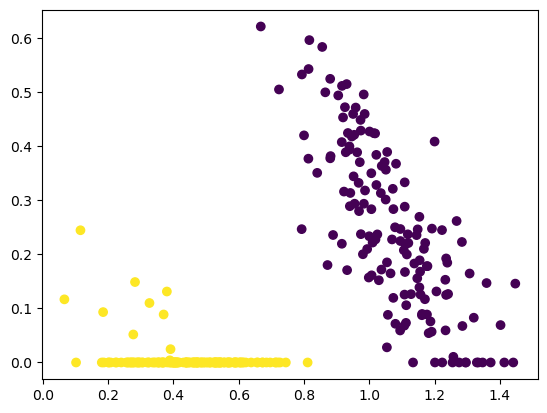

In [115]:
plt.scatter(x=encoded_2dim[:,0],y=encoded_2dim[:,1],c=y)  ##all rows, 1st column